# Hiring Prediction

This project is based on the simple use of Decision trees and Random Forest.

I will use a sample data set that is completely made up to predict if a person will be hired or not based on their past.

## Based on <font color="red"> Decision Trees</font>

In [8]:
import numpy as np
import pandas as pd
from sklearn import tree # import decision tree from scikit learn library

input_file = "PastHires.csv" 
df = pd.read_csv(input_file, header = 0) # Read the dataset

In [9]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


* Map the 'Yes' and 'No' to Numeric values.

In [10]:
# Convert the alphabetical entries to numerical entries
d = {'Y': 1, 'N': 0}
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
df['Hired'] = df['Hired'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


* Separate features form the target column.

In [11]:
# List the factors involved in making the decision to hire or not
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

* Construct the Tree.

In [12]:
y = df["Hired"]
X = df[features]
clf = tree.DecisionTreeClassifier() # Decision tree Classifier
clf = clf.fit(X,y)

* Display the tree.

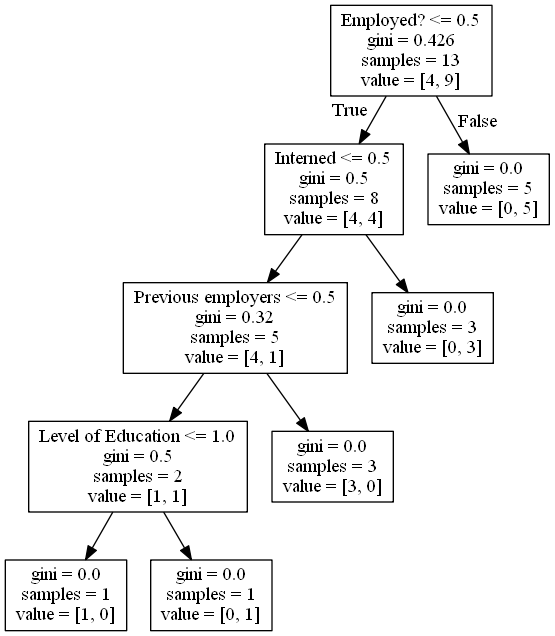

In [13]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

## Ensemble Learning: using a <font color="red">Random Forest</font>

I'll use random forest of 10 decision trees to predict employment of specific candidate profiles.

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10) # Set number of decision trees
clf = clf.fit(X, y)

print (clf.predict([[10, 1, 4, 0, 0, 0]])) # Predict employment of a person with 10 year experience
print (clf.predict([[10, 0, 4, 0, 0, 0]])) # Predict employment of a person who is unemployed for 10 years

[1]
[0]
